<a href="https://colab.research.google.com/github/arthaAgastya/data-science-fundamental/blob/main/Tugas_Akhir_Data_Science_Fundamental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Laporan Tugas Akhir</h1>
Sistem Prediksi Jumlah Terkonfirmasi Positif Covid-19 dan Jenis Pembatasan Pergerakan Masyarakat di Jakarta

<h2>Definisi Permasalahan </h2>


Novel corona virus 2019 (COVID-19) pertama kali terdeteksi di Tiongkok pada akhir 2019. Virus tersebut menyebabkan gejala pernapasan seperti demam, batuk, pneumonia, dan diare pada pasien [1]. Organisasi Kesehatan Dunia (WHO) mendapat laporan dari pemerintah China pada tanggal 31 Desember 2019 mengenai penyakit ini dengan laporan kasus pneumonia atau paru – paru basah di Wuhan, di Provinsi Hubei, China. Seminggu kemudian, pemerintah China mengkonfirmasi bahwa COVID-19 telah teridentifikasi sebagai penyebab pneumonia tersebut [2]. Kemudian media memberitakan bahwa banyak kasus baru tercatat di negara lain karena perjalanan dan perdagangan internasional masih beroperasi seperti biasa.

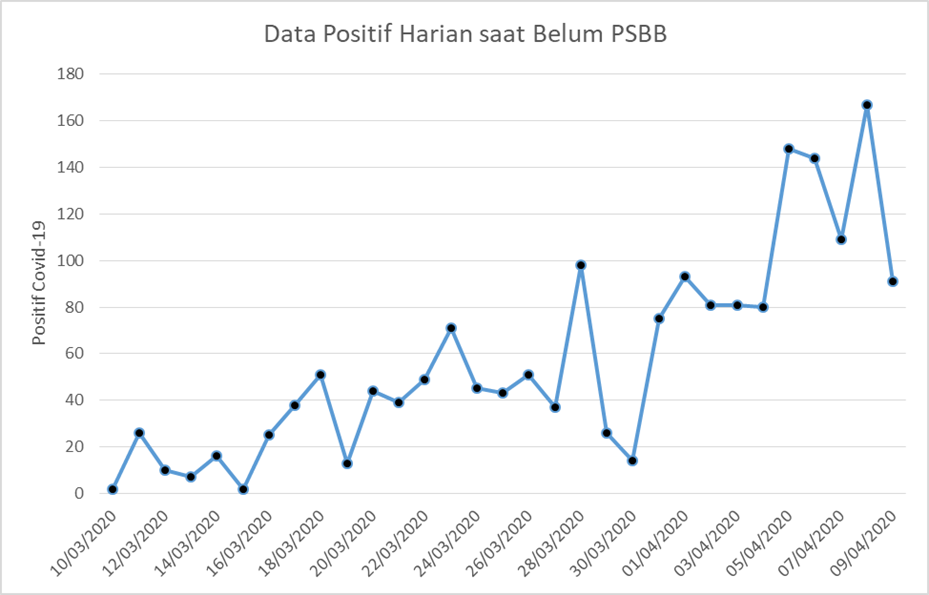

In [ ]:
import pandas as pd
import numpy as np

 load data and store in dataframe df:


In [ ]:
!gdown 1IVyRV0JFygVNqi35MR6iNdm69ueoWciM

Downloading...
From: https://drive.google.com/uc?id=1IVyRV0JFygVNqi35MR6iNdm69ueoWciM
To: /content/Data_Jakarta_Fix_v2.xlsx
100% 31.5k/31.5k [00:00<00:00, 113MB/s]


In [ ]:
df = pd.read_excel(r'Data_Jakarta_Fix_v2.xlsx',engine='openpyxl')
df.head()

,Tanggal,KRL,MRT,LRT,Bus,Kemacetan,Hujan,Sinar,Kelembaban,pm10,pm25,Suhu,Kec_Angin,Status,Tes_Harian,Positif_Harian
0,2020-03-10,618266,46787,2024,559231,0.44,NaN,5.4,66.2,22.0,78.0,29.9,2.7,NO_PSBB,52,2
1,2020-03-11,618266,46787,2024,559231,0.44,NaN,7.0,71.0,26.0,78.0,29.4,2.7,NO_PSBB,48,26
2,2020-03-12,618266,46787,2024,559231,0.44,7.7,5.7,83.0,32.0,89.0,26.1,1.4,NO_PSBB,56,10
3,2020-03-13,618266,46787,2024,559231,0.44,29.2,2.6,66.3,21.0,80.0,29.2,2.0,NO_PSBB,30,7
4,2020-03-14,618266,46787,2024,559231,0.44,0.0,6.5,74.2,59.0,151.0,27.7,2.4,NO_PSBB,44,16


<h2 id="pattern_visualization">2. Analyzing Individual Feature Patterns using Visualization</h2>


To install seaborn we use the pip which is the python package manager.


In [ ]:
# %%capture
# ! pip install seaborn

 Import visualization packages "Matplotlib" and "Seaborn", don't forget about "%matplotlib inline" to plot in a Jupyter notebook.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

<h4>How to choose the right visualization method?</h4>
<p>When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.</p>


In [ ]:
# list the data types for each column
print(df.dtypes)

Tanggal           datetime64[ns]
KRL                        int64
MRT                        int64
LRT                        int64
Bus                        int64
Kemacetan                float64
Hujan                    float64
Sinar                    float64
Kelembaban               float64
pm10                     float64
pm25                     float64
Suhu                     float64
Kec_Angin                float64
Status                    object
Tes_Harian                 int64
Positif_Harian             int64
dtype: object


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h3>Question  #1:</h3>

<b>What is the data type of the column "peak-rpm"? </b>

</div>


In [ ]:
df = df.fillna(df.mean(numeric_only=True)) # isi NA dengan rata2

<details><summary>Click here for the solution</summary>

```python
float64
```

</details>


For example, we can calculate the correlation between variables  of type "int64" or "float64" using the method "corr":


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df.describe()

,KRL,MRT,LRT,Bus,Kemacetan,Hujan,Sinar,Kelembaban,pm10,pm25,Suhu,Kec_Angin,Tes_Harian,Positif_Harian
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,326717.551724,14614.846743,727.325670,251539.789272,0.283456,514.307006,4.859274,74.991571,52.547619,117.798319,29.374713,3.016475,6080.831418,506.950192
std,117980.522647,11273.043628,461.292721,131444.533562,0.073160,1604.638197,2.200191,20.901205,20.539496,33.341722,2.208021,1.383334,4425.058313,446.546416
min,169233.000000,1451.000000,198.000000,80396.000000,0.150000,0.000000,0.000000,45.100000,10.000000,46.000000,25.000000,0.700000,30.000000,2.000000
25%,286366.000000,11351.000000,613.000000,149401.000000,0.260000,0.000000,3.500000,64.000000,40.000000,95.000000,28.000000,2.000000,2211.000000,107.000000
50%,337600.000000,12991.000000,632.000000,285011.000000,0.280000,13.800000,5.200000,70.000000,52.547619,117.000000,29.400000,2.600000,5295.000000,319.000000
75%,370533.000000,17393.000000,872.000000,307195.000000,0.341000,514.307006,6.400000,78.500000,58.000000,134.000000,30.100000,3.600000,10021.000000,937.000000
max,618266.000000,46787.000000,2024.000000,559231.000000,0.440000,8888.000000,9.800000,166.000000,154.000000,314.000000,35.000000,10.200000,17871.000000,1702.000000


In [ ]:
df.describe().to_csv('statistic.csv')

In [ ]:
df.corr()

<ipython-input-13-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,KRL,MRT,LRT,Bus,Kemacetan,Hujan,Sinar,Kelembaban,pm10,pm25,Suhu,Kec_Angin,Tes_Harian,Positif_Harian
KRL,1.000000,0.968705,0.977191,0.976540,0.769049,-0.079574,0.067369,0.022985,0.059112,-0.042846,-0.141174,-0.095415,0.131909,0.147925
MRT,0.968705,1.000000,0.998023,0.925209,0.702249,-0.083747,0.024640,0.062598,-0.011674,-0.014381,-0.135935,-0.104473,-0.079675,-0.053810
LRT,0.977191,0.998023,1.000000,0.933218,0.725550,-0.083868,0.028181,0.050520,-0.005684,-0.016418,-0.142842,-0.107288,-0.055982,-0.035705
Bus,0.976540,0.925209,0.933218,1.000000,0.747539,-0.066497,0.096945,0.018479,0.037038,-0.117657,-0.156853,-0.124259,0.238140,0.293295
Kemacetan,0.769049,0.702249,0.725550,0.747539,1.000000,-0.069605,0.025379,0.019691,0.026952,-0.083541,-0.150321,-0.154187,0.160516,0.176936
Hujan,-0.079574,-0.083747,-0.083868,-0.066497,-0.069605,1.000000,-0.103326,0.066046,0.057259,0.058383,-0.048493,-0.016581,0.073150,0.063806
Sinar,0.067369,0.024640,0.028181,0.096945,0.025379,-0.103326,1.000000,-0.059844,0.134725,0.090261,0.144270,0.078625,0.166773,0.210442
Kelembaban,0.022985,0.062598,0.050520,0.018479,0.019691,0.066046,-0.059844,1.000000,0.512166,0.356030,0.467018,0.354499,-0.165345,-0.135111
pm10,0.059112,-0.011674,-0.005684,0.037038,0.026952,0.057259,0.134725,0.512166,1.000000,0.627930,0.588354,0.543430,0.255970,0.212367
pm25,-0.042846,-0.014381,-0.016418,-0.117657,-0.083541,0.058383,0.090261,0.356030,0.627930,1.000000,0.371267,0.229586,-0.121680,-0.177297


In [ ]:
# df.corr().to_csv('corelation.csv')

In [ ]:
import matplotlib as mpl 
mpl.rcParams['figure.dpi'] = 300

<ipython-input-21-43216a740681>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')


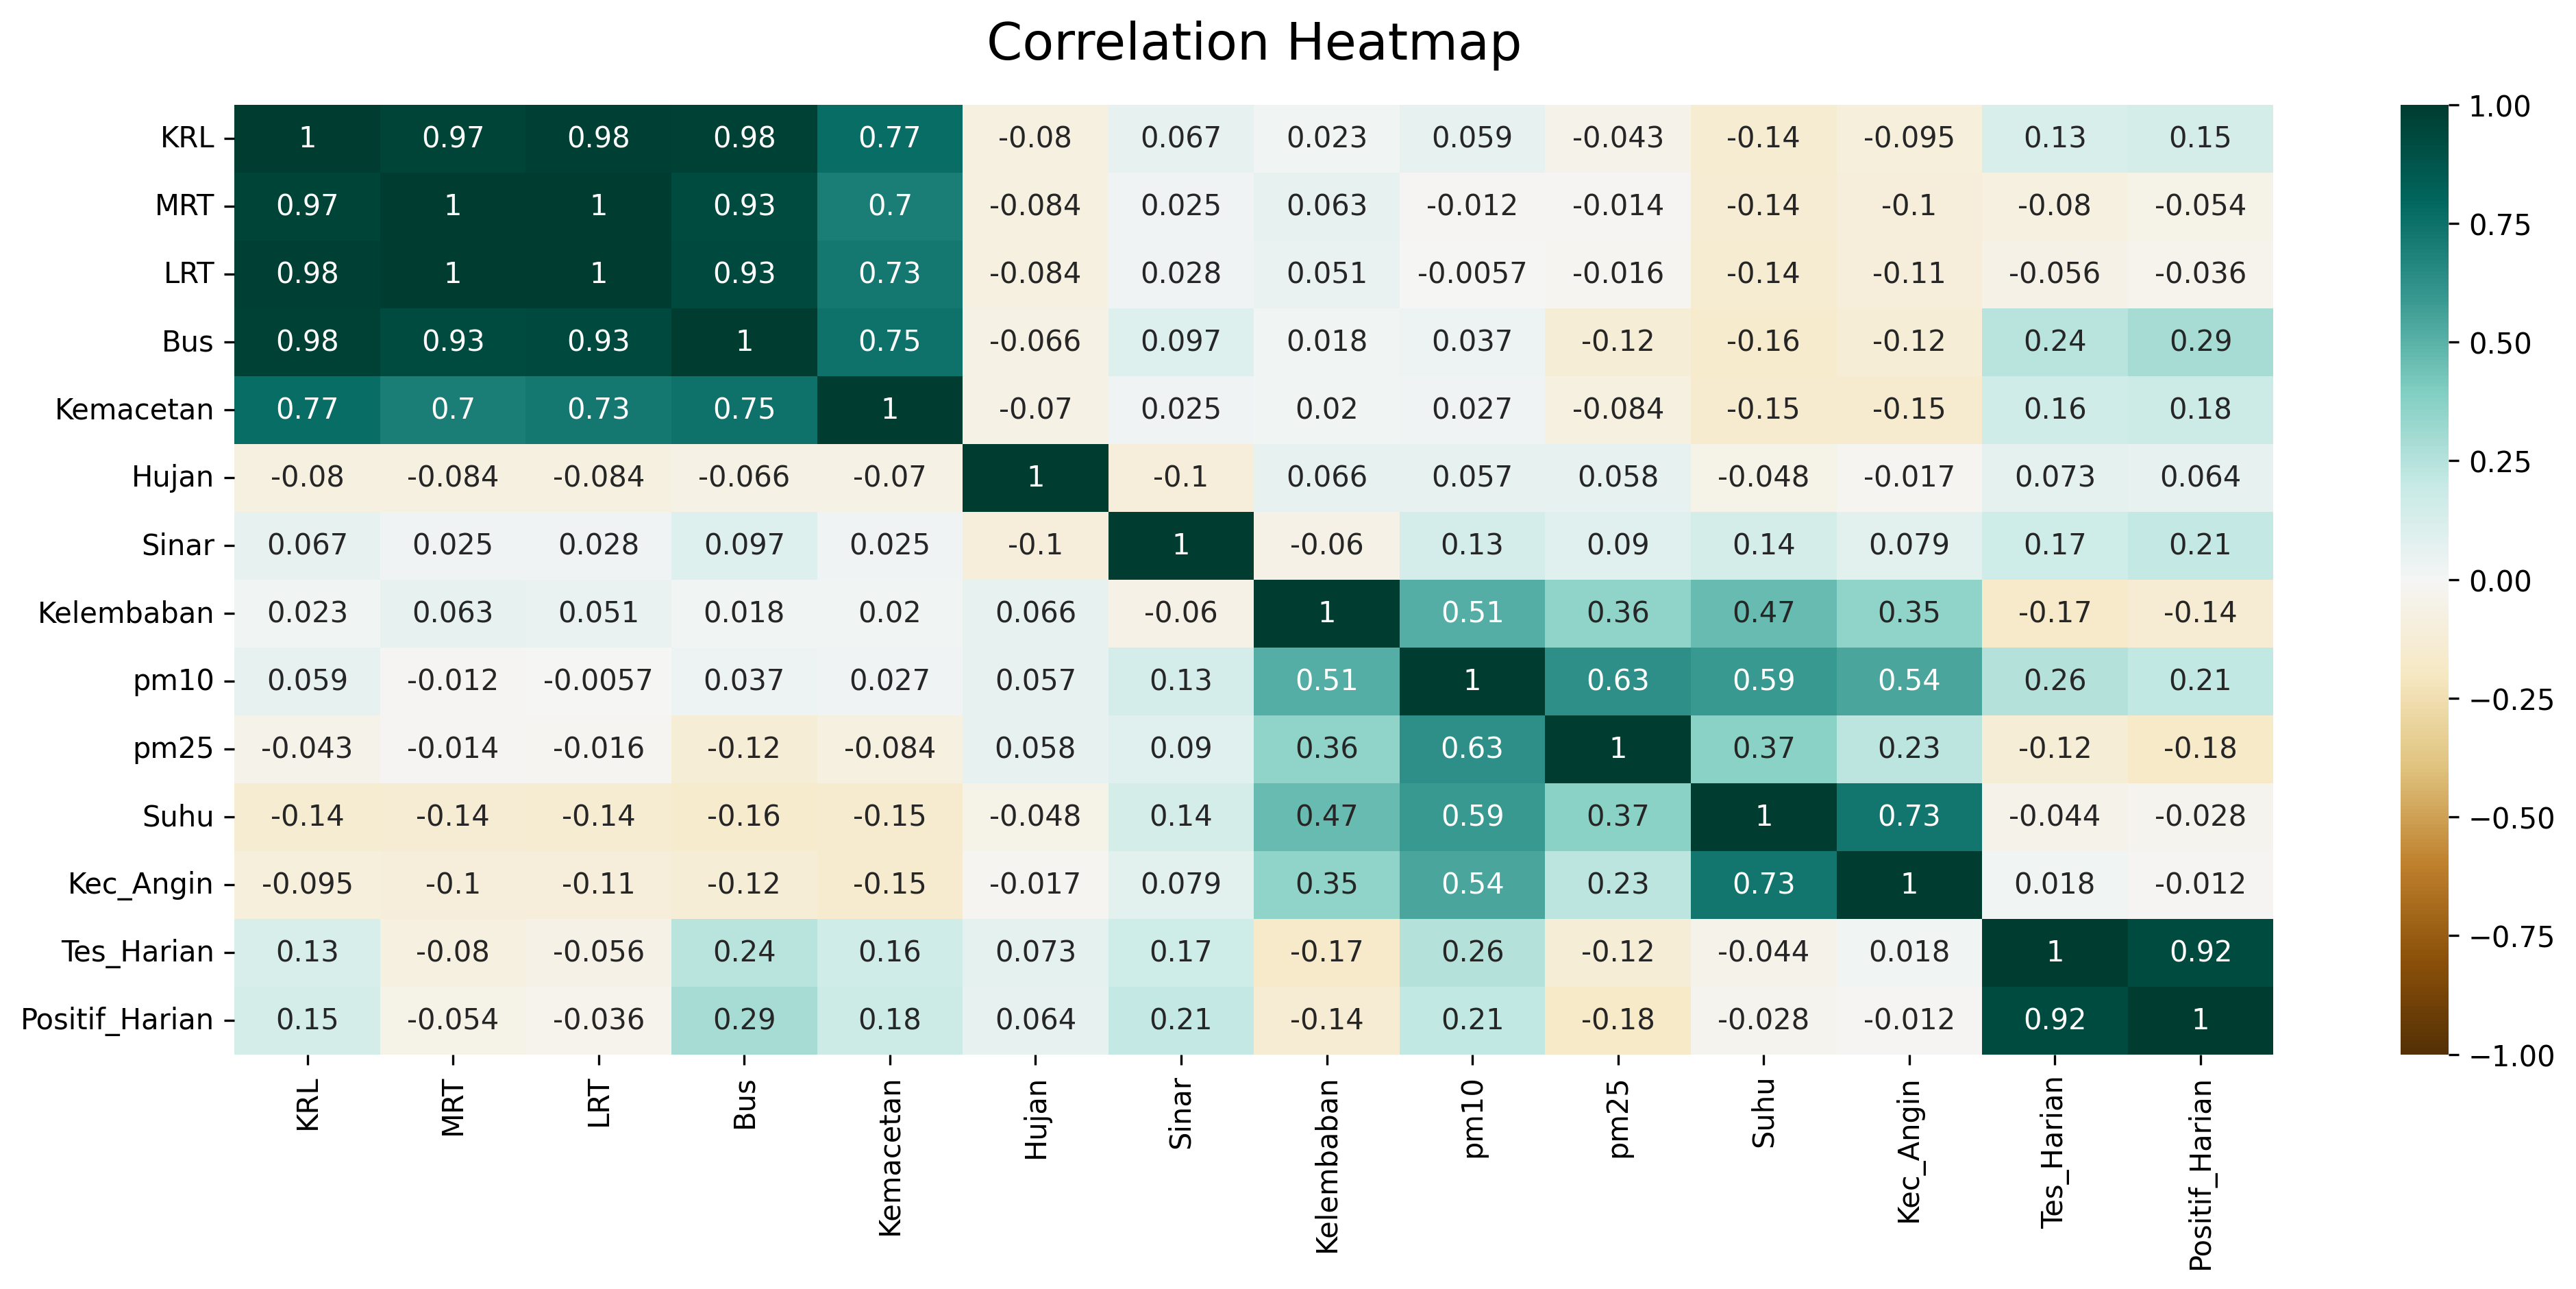

In [ ]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
# mask = np.triu(np.ones_like(df.corr(), dtype=bool))
# heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [ ]:
df.describe()

,KRL,MRT,LRT,Bus,Kemacetan,Hujan,Sinar,Kelembaban,pm10,pm25,Suhu,Kec_Angin,Tes_Harian,Positif_Harian
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,326717.551724,14614.846743,727.325670,251539.789272,0.283456,514.307006,4.859274,74.991571,52.547619,117.798319,29.374713,3.016475,6080.831418,506.950192
std,117980.522647,11273.043628,461.292721,131444.533562,0.073160,1604.638197,2.200191,20.901205,20.539496,33.341722,2.208021,1.383334,4425.058313,446.546416
min,169233.000000,1451.000000,198.000000,80396.000000,0.150000,0.000000,0.000000,45.100000,10.000000,46.000000,25.000000,0.700000,30.000000,2.000000
25%,286366.000000,11351.000000,613.000000,149401.000000,0.260000,0.000000,3.500000,64.000000,40.000000,95.000000,28.000000,2.000000,2211.000000,107.000000
50%,337600.000000,12991.000000,632.000000,285011.000000,0.280000,13.800000,5.200000,70.000000,52.547619,117.000000,29.400000,2.600000,5295.000000,319.000000
75%,370533.000000,17393.000000,872.000000,307195.000000,0.341000,514.307006,6.400000,78.500000,58.000000,134.000000,30.100000,3.600000,10021.000000,937.000000
max,618266.000000,46787.000000,2024.000000,559231.000000,0.440000,8888.000000,9.800000,166.000000,154.000000,314.000000,35.000000,10.200000,17871.000000,1702.000000


In [ ]:
df.describe().to_excel("output.xlsx") 